In [1]:
# Import modules
import pandas as pd
import mysql.connector
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Connect to database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="Goodboy.5",
  database="insertion_pro",
  auth_plugin='mysql_native_password'
)
mycursor = mydb.cursor()

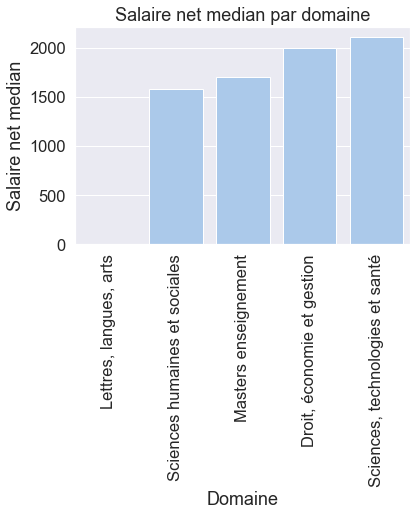

In [18]:
# Afficher le salaire net median par Domaine
sql = "SELECT distinct salaire_net_median_des_emplois_a_temps_plein, nom_domaine from Statistiques join Discipline on Statistiques.id_discipline = Discipline.id_discipline join Domaine on discipline.code_domaine = Domaine.code_domaine group by discipline.code_domaine"
mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)

domaine = df[1]
salaire = df[0]

# Visualiser les données
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.barplot(x= domaine, y= salaire, color="b")
plt.xlabel('Domaine')
plt.ylabel('Salaire net median')
plt.title("Salaire net median par domaine")
plt.xticks(rotation=90)
plt.show()

In [11]:
df

,0
0,2000.0
1,NaN
2,1700.0
3,1580.0
4,2110.0


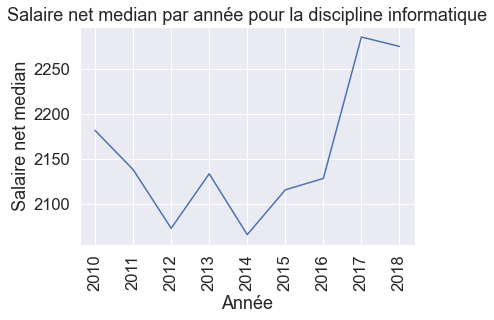

In [27]:
# afficher la moyenne du salaire_net_median_des_emplois_a_temps_plein par année pour la discipline 'Informatique'
sql = "select annee, avg(salaire_net_median_des_emplois_a_temps_plein) from enquete join statistiques using (annee, situation, diplome) join discipline on statistiques.id_discipline = discipline.id_discipline where nom_discipline='informatique' GROUP BY annee;"

mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)

annees = df[0]
salaire = df[1]

sns.set_theme(style="darkgrid")
# Visualiser les données
sns.set(font_scale=1.5)
sns.lineplot(x= annees, y= salaire)
plt.xlabel('Année')
plt.ylabel('Salaire net median')
plt.title("Salaire net median par année pour la discipline informatique")
plt.xticks(rotation=90)
plt.show()

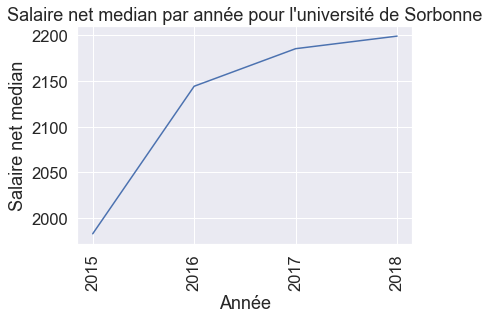

In [76]:
# Afficher l'évolution du salaire net median par année pour l'université de piérre et marie curie
sql = "select annee, avg(salaire_net_median_des_emplois_a_temps_plein) from enquete join statistiques using (annee, situation, diplome) join Etablissement on statistiques.id_etablissement = Etablissement.id_etablissement where nom_etablissement='Sorbonne Université' or nom_etablissement_actuel ='Sorbonne Université' GROUP BY annee;"
mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)

# Visualiser les données
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.lineplot(x= df[0], y= df[1])
plt.xlabel('Année')
plt.ylabel('Salaire net median')
plt.title("Salaire net median par année pour Sorbonne Université")
plt.xticks(rotation=90)
plt.show()

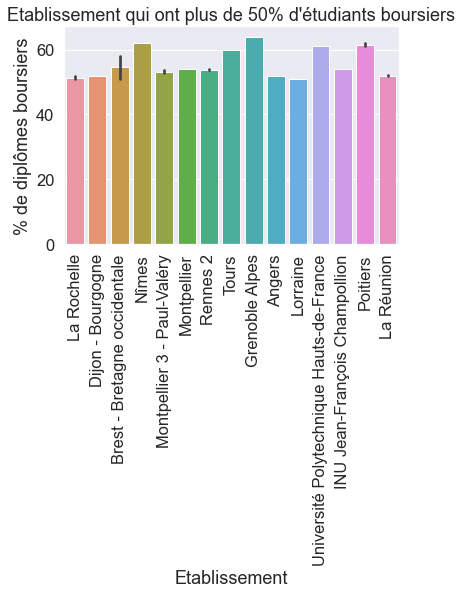

In [79]:
# Afficher les etablissement qui ont plus de 50% d'étudiants boursiers
sql = "select nom_etablissement , de_diplomes_boursiers from etablissement join statistiques using (id_etablissement) where de_diplomes_boursiers > 50;"
mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)

# Visualiser les données
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.barplot(x= df[0], y= df[1])
plt.xlabel('Etablissement')
plt.ylabel('% de diplômes boursiers')
plt.title("Etablissement qui ont plus de 50% d'étudiants boursiers")
plt.xticks(rotation=90)
plt.show()

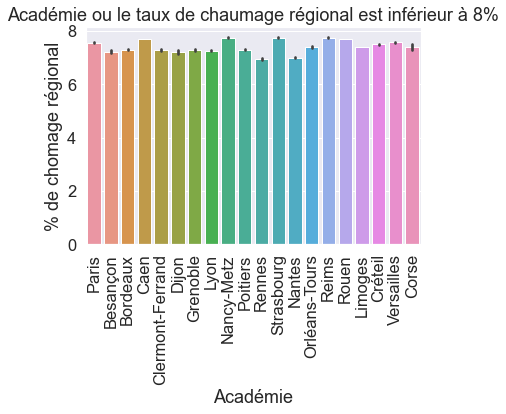

In [86]:
# Afficher les académies ou le taux de chaumage regionel est inférieur à 8%
sql = "select nom_academie, taux_de_chomage_regional from academie join etablissement using (id_academie) join statistiques using (id_etablissement) where taux_de_chomage_regional < 8;"
mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)

# Visualiser les données
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.barplot(x= df[0], y= df[1])
plt.xlabel('Académie')
plt.ylabel('% de chomage régional')
plt.title("Académie ou le taux de chaumage régional est inférieur à 8%")
plt.xticks(rotation=90)
plt.show()

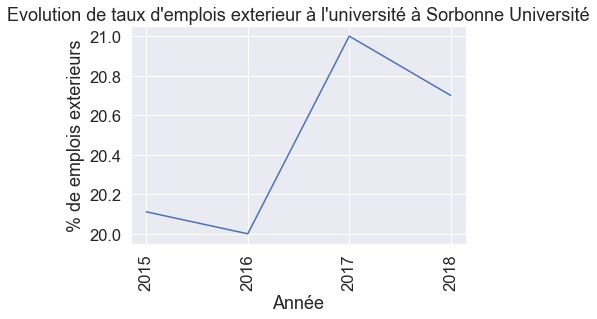

In [89]:
# Afficher l'evolution de taux d'mplois exterieur à l'université à Sorbonne Université
sql = "select annee, avg(emplois_exterieurs_a_la_region_de_luniversite) from enquete join statistiques using (annee, situation, diplome) join Etablissement on statistiques.id_etablissement = Etablissement.id_etablissement where nom_etablissement='Sorbonne Université' or nom_etablissement_actuel ='Sorbonne Université' GROUP BY annee;"
mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)

# Visualiser les données
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.lineplot(x= df[0], y= df[1])
plt.xlabel('Année')
plt.ylabel('% de emplois exterieurs')
plt.title("Evolution de taux d'emplois exterieur à l'université à Sorbonne Université")
plt.xticks(rotation=90)
plt.show()


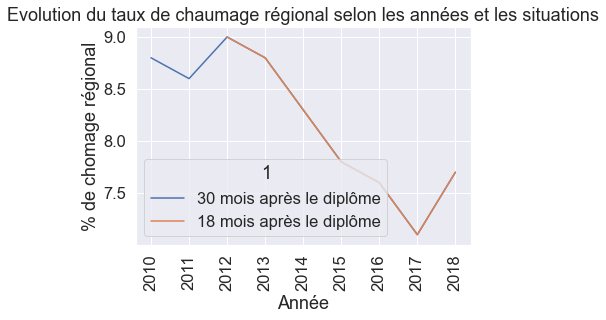

In [115]:
# Afficher l'evolution du taux de chaumage régional  selon les années et les situations
sql = "select annee, situation, taux_de_chomage_regional from enquete join statistiques using (annee, situation, diplome) join Etablissement on statistiques.id_etablissement = Etablissement.id_etablissement GROUP BY annee, situation;"
mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)

# Visualiser les données
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.lineplot(x= df[0], y= df[2], hue= df[1])
plt.xlabel('Année')
plt.ylabel('% de chomage régional')
plt.title("Evolution du taux de chaumage régional selon les années et les situations")
plt.xticks(rotation=90)
plt.show()

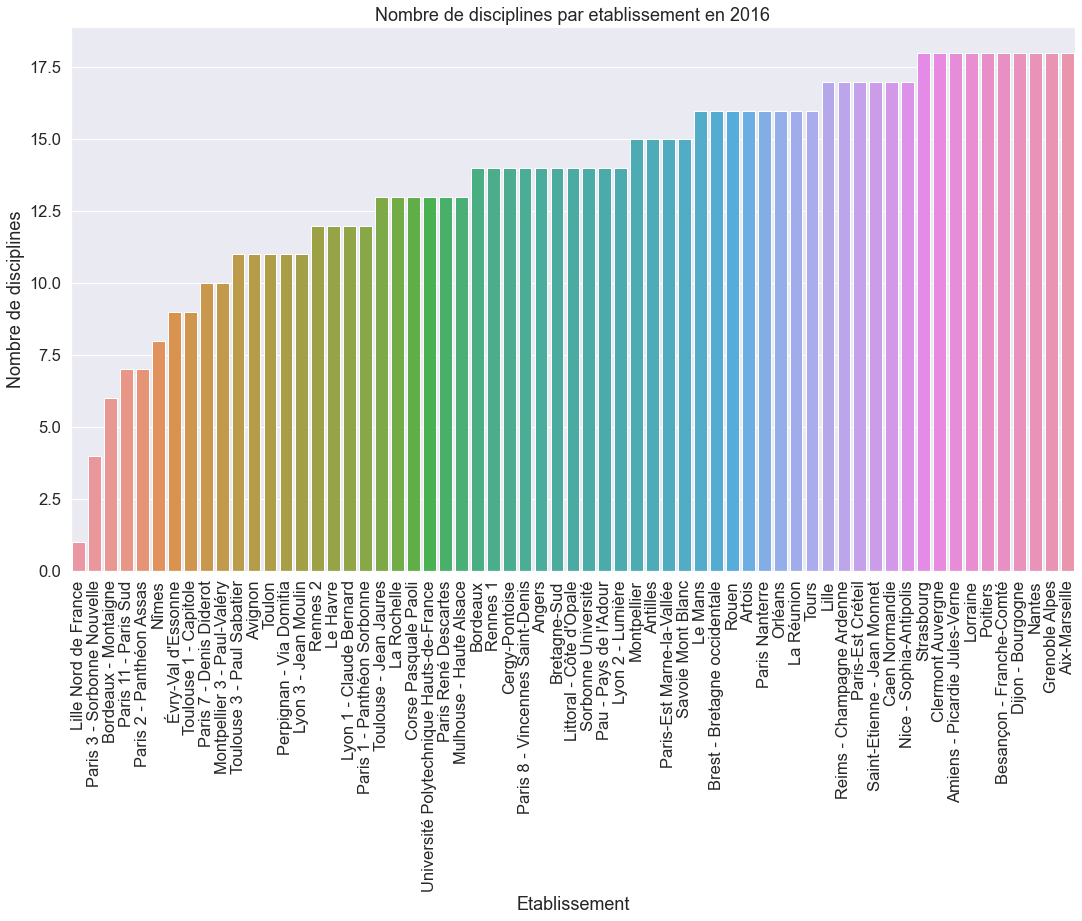

In [135]:
#Affichier le nombre de disciplines par etablissement en 2016
sql = "select nom_etablissement, count(id_discipline) l from etablissement join statistiques using (id_etablissement) join discipline using(id_discipline) where annee = 2016 and situation ='30 mois après le diplôme' GROUP BY nom_etablissement order by l;"
mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)
plt.figure(figsize=(18,10))
# Visualiser les données
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.barplot(x= df[0], y= df[1])
plt.xlabel('Etablissement')
plt.ylabel('Nombre de disciplines')
plt.title("Nombre de disciplines par etablissement en 2016")
plt.xticks(rotation=90)
plt.show()
